In [73]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from glob import glob
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
filenames_darks=sorted(glob('2-16-2020/lab1_sbig-000*_dark*.fit') )
filenames_flats=sorted(glob('Flats to Share/Copy of lab1_sbig-000*_flat*.fit'))
filenames_bias=sorted(glob('WrinkliestFlats/Wrinkliest-2-9-2020-000*_bias*.fit'))
filenames_darks

['2-16-2020/lab1_sbig-0001_dark_10s.fit',
 '2-16-2020/lab1_sbig-0001_dark_20s.fit',
 '2-16-2020/lab1_sbig-0001_dark_30s.fit',
 '2-16-2020/lab1_sbig-0001_dark_40s.fit',
 '2-16-2020/lab1_sbig-0002_dark_10s.fit',
 '2-16-2020/lab1_sbig-0002_dark_20s.fit',
 '2-16-2020/lab1_sbig-0002_dark_30s.fit',
 '2-16-2020/lab1_sbig-0002_dark_40s.fit',
 '2-16-2020/lab1_sbig-0003_dark_10s.fit',
 '2-16-2020/lab1_sbig-0003_dark_20s.fit',
 '2-16-2020/lab1_sbig-0003_dark_30s.fit',
 '2-16-2020/lab1_sbig-0003_dark_40s.fit',
 '2-16-2020/lab1_sbig-0004_dark_10s.fit',
 '2-16-2020/lab1_sbig-0004_dark_20s.fit',
 '2-16-2020/lab1_sbig-0004_dark_30s.fit',
 '2-16-2020/lab1_sbig-0004_dark_40s.fit',
 '2-16-2020/lab1_sbig-0005_dark_10s.fit',
 '2-16-2020/lab1_sbig-0005_dark_20s.fit',
 '2-16-2020/lab1_sbig-0005_dark_30s.fit',
 '2-16-2020/lab1_sbig-0005_dark_40s.fit']

In [75]:
#creating the master dark for each exposure time
master_dark_10s=np.median([fits.getdata(filenames_darks[0]),fits.getdata(filenames_darks[4]),fits.getdata(filenames_darks[8]),fits.getdata(filenames_darks[12]),fits.getdata(filenames_darks[16])],axis=0)
master_dark_20s=np.median([fits.getdata(filenames_darks[1]),fits.getdata(filenames_darks[5]),fits.getdata(filenames_darks[9]),fits.getdata(filenames_darks[13]),fits.getdata(filenames_darks[17])],axis=0)
master_dark_30s=np.median([fits.getdata(filenames_darks[2]),fits.getdata(filenames_darks[6]),fits.getdata(filenames_darks[10]),fits.getdata(filenames_darks[14]),fits.getdata(filenames_darks[18])],axis=0)
master_dark_40s=np.median([fits.getdata(filenames_darks[3]),fits.getdata(filenames_darks[7]),fits.getdata(filenames_darks[1]),fits.getdata(filenames_darks[15]),fits.getdata(filenames_darks[19])],axis=0)

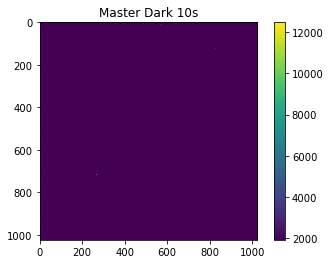

In [76]:
a=plt.figure()
plt.imshow(master_dark_10s)
plt.title('Master Dark 10s')
plt.colorbar()
a.savefig("masterdark10.jpg", bbox_inches='tight')

1963.160177230835 25.580447753000318


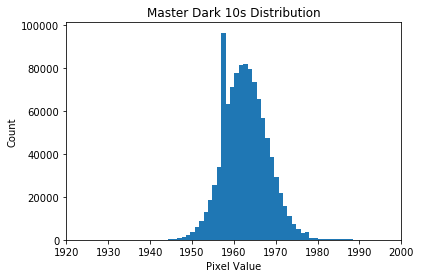

In [77]:
#histogram for 10s master dark showing pixel value distribution
a=plt.figure()
plt.hist(master_dark_10s.flatten(), bins=10000)
plt.xlim(1920,2000)
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.title('Master Dark 10s Distribution')

a.savefig("masterdark10dist.jpg", bbox_inches='tight')
print(np.mean(master_dark_10s),np.std(master_dark_10s))

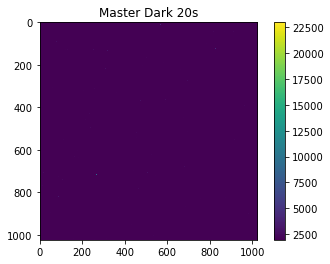

In [78]:
a=plt.figure()
plt.imshow(master_dark_20s)
plt.title('Master Dark 20s')
plt.colorbar()
a.savefig("masterdark20.jpg", bbox_inches='tight')

1965.8340015411377 49.78344627824149


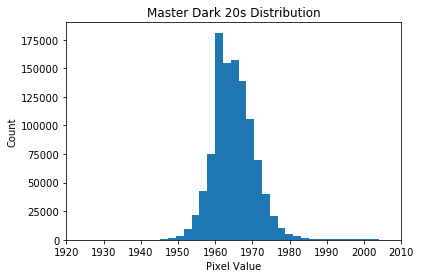

In [79]:
#histogram for 20s master dark showing pixel value distribution
a=plt.figure()
plt.hist(master_dark_20s.flatten(), bins=10000)
plt.xlim(1920,2010)
plt.title('Master Dark 20s Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
print(np.mean(master_dark_20s),np.std(master_dark_20s))
a.savefig("masterdark20dist.jpg", bbox_inches='tight')

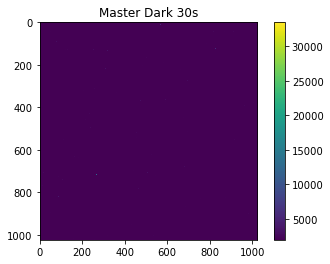

In [80]:
a=plt.figure()
plt.imshow(master_dark_30s)
plt.title('Master Dark 30s')
plt.colorbar()
a.savefig("masterdark30.jpg", bbox_inches='tight')

1968.1973447799683 73.32079883020181


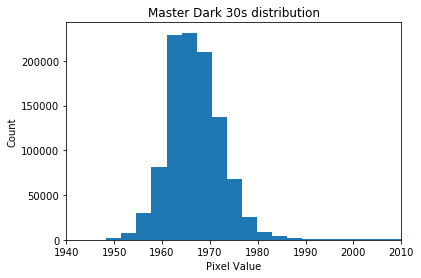

In [81]:
a=plt.figure()
plt.hist(master_dark_30s.flatten(), bins=10000)
plt.xlim(1940,2010)
plt.title('Master Dark 30s distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
print(np.mean(master_dark_30s),np.std(master_dark_30s))
a.savefig("masterdark30dist.jpg", bbox_inches='tight')

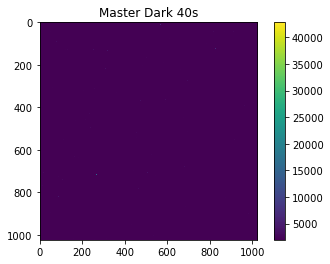

In [82]:
a=plt.figure()
plt.imshow(master_dark_40s)
plt.title('Master Dark 40s')
plt.colorbar()
a.savefig("masterdark40.jpg", bbox_inches='tight')

1970.4645137786865 94.08700852358967


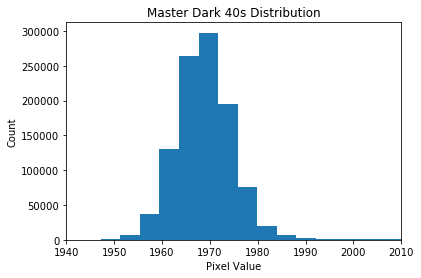

In [83]:
a=plt.figure()
plt.hist(master_dark_40s.flatten(), bins=10000)
plt.xlim(1940,2010)
plt.title('Master Dark 40s Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
print(np.mean(master_dark_40s),np.std(master_dark_40s))
a.savefig("masterdark40dist.jpg", bbox_inches='tight')

In [84]:
filenames_flats

['Flats to Share/Copy of lab1_sbig-0001_flat_B_10s.fit',
 'Flats to Share/Copy of lab1_sbig-0001_flat_R_10s.fit',
 'Flats to Share/Copy of lab1_sbig-0001_flat_V_10s.fit',
 'Flats to Share/Copy of lab1_sbig-0002_flat_B_10s.fit',
 'Flats to Share/Copy of lab1_sbig-0002_flat_R_10s.fit',
 'Flats to Share/Copy of lab1_sbig-0002_flat_V_10s.fit',
 'Flats to Share/Copy of lab1_sbig-0003_flat_B_10s.fit',
 'Flats to Share/Copy of lab1_sbig-0003_flat_R_10s.fit',
 'Flats to Share/Copy of lab1_sbig-0003_flat_V_10s.fit',
 'Flats to Share/Copy of lab1_sbig-0004_flat_B_10s.fit',
 'Flats to Share/Copy of lab1_sbig-0004_flat_R_10s.fit',
 'Flats to Share/Copy of lab1_sbig-0004_flat_V_10s.fit',
 'Flats to Share/Copy of lab1_sbig-0005_flat_B_10s.fit',
 'Flats to Share/Copy of lab1_sbig-0005_flat_R_10s.fit',
 'Flats to Share/Copy of lab1_sbig-0005_flat_V_10s.fit']

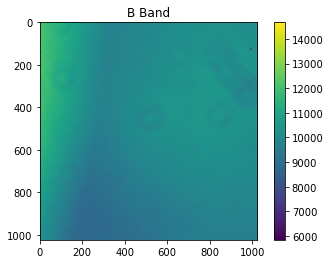

In [85]:
#B Band flats
a=plt.figure()
master_flat_B=np.median([fits.getdata(filenames_flats[0]),fits.getdata(filenames_flats[3]),fits.getdata(filenames_flats[6]),fits.getdata(filenames_flats[9]),fits.getdata(filenames_flats[12])],axis=0)
plt.imshow(master_flat_B)
plt.title('B Band')
plt.colorbar()
a.savefig("bband.jpg", bbox_inches='tight')

10086.805959701538 583.8333225793435


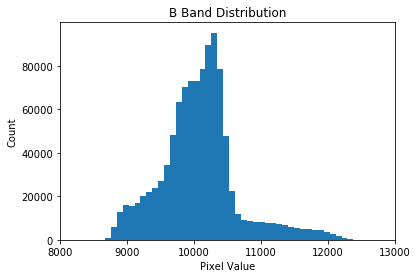

In [86]:
#B Band distribution, mean, std
a=plt.figure()
plt.hist(master_flat_B.flatten(), bins=100)
plt.xlim(8000,13000)
plt.title('B Band Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
print(np.mean(master_flat_B),np.std(master_flat_B))
a.savefig("bbanddist.jpg", bbox_inches='tight')

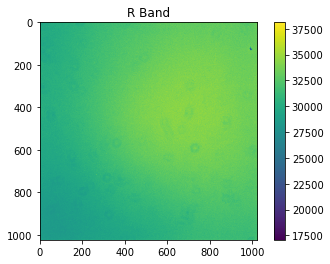

In [87]:
#R Band flats
a=plt.figure()
master_flat_R=np.median([fits.getdata(filenames_flats[1]),fits.getdata(filenames_flats[4]),fits.getdata(filenames_flats[7]),fits.getdata(filenames_flats[10]),fits.getdata(filenames_flats[13])],axis=0)
plt.imshow(master_flat_R)
plt.title('R Band')
plt.colorbar()
a.savefig("rband.jpg", bbox_inches='tight')

31995.31688308716 1617.1105111078505


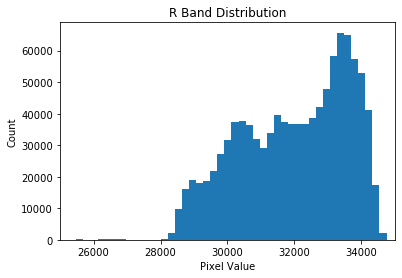

In [88]:
#R Band distribution, mean, std
a=plt.figure()
plt.hist(master_flat_R.flatten(), bins=100)
plt.xlim(25000,35000)
plt.title('R Band Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
print(np.mean(master_flat_R),np.std(master_flat_R))
a.savefig("rbanddist.jpg", bbox_inches='tight')

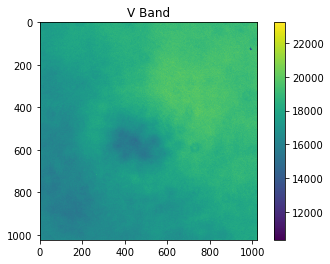

In [89]:
# V Band Flats
a=plt.figure()
master_flat_V=np.median([fits.getdata(filenames_flats[2]),fits.getdata(filenames_flats[5]),fits.getdata(filenames_flats[8]),fits.getdata(filenames_flats[11]),fits.getdata(filenames_flats[14])],axis=0)
plt.imshow(master_flat_V)
plt.title('V Band')
plt.colorbar()
a.savefig("vband.jpg", bbox_inches='tight')

17876.14858341217 1135.6723031603085


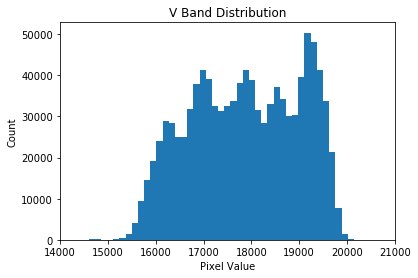

In [90]:
#V Band distribution, mean, std
a=plt.figure()
plt.hist(master_flat_V.flatten(), bins=100)
plt.xlim(14000,21000)
plt.title('V Band Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
print(np.mean(master_flat_V),np.std(master_flat_V))
a.savefig("vbanddist.jpg", bbox_inches='tight')

In [91]:
filenames_bias

['WrinkliestFlats/Wrinkliest-2-9-2020-0001_bias.fit',
 'WrinkliestFlats/Wrinkliest-2-9-2020-0002_bias.fit',
 'WrinkliestFlats/Wrinkliest-2-9-2020-0003_bias.fit',
 'WrinkliestFlats/Wrinkliest-2-9-2020-0004_bias.fit',
 'WrinkliestFlats/Wrinkliest-2-9-2020-0005_bias.fit',
 'WrinkliestFlats/Wrinkliest-2-9-2020-0006_bias.fit',
 'WrinkliestFlats/Wrinkliest-2-9-2020-0007_bias.fit']

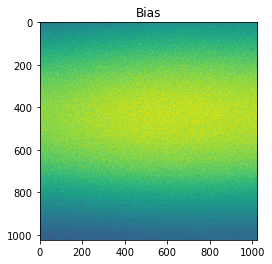

In [92]:
#Bias Frame
a=plt.figure()
master_bias=np.median([fits.getdata(filenames_bias[0]),fits.getdata(filenames_bias[1]),fits.getdata(filenames_bias[2]),fits.getdata(filenames_bias[3]),fits.getdata(filenames_bias[4]),fits.getdata(filenames_bias[5]),fits.getdata(filenames_bias[6])],axis=0)
plt.imshow(master_bias)
plt.title('Bias')
a.savefig("bias.jpg", bbox_inches='tight')

5365.392149925232 164.60217075116677


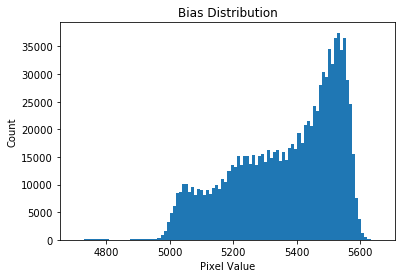

In [93]:
#bias distribution
a=plt.figure()
plt.hist(master_bias.flatten(), bins=100)
print(np.mean(master_bias),np.std(master_bias))
plt.title('Bias Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
a.savefig("biasdist.jpg", bbox_inches='tight')

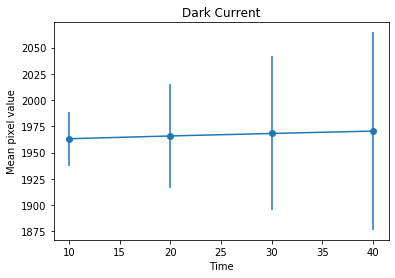

In [94]:
#Dark Current vs Time
a=plt.figure()
dark_mean_10s=np.mean(master_dark_10s)
dark_mean_20s=np.mean(master_dark_20s)
dark_mean_30s=np.mean(master_dark_30s)
dark_mean_40s=np.mean(master_dark_40s)
dark_mean_time=[10,20,30,40]
dark_mean_data=[dark_mean_10s,dark_mean_20s,dark_mean_30s,dark_mean_40s]
dark_mean_error=[np.std(master_dark_10s),np.std(master_dark_20s),np.std(master_dark_30s),np.std(master_dark_40s)]
plt.scatter(dark_mean_time,dark_mean_data)
plt.errorbar(dark_mean_time,dark_mean_data, xerr=0, yerr=dark_mean_error)
plt.title('Dark Current')
plt.xlabel('Time')
plt.ylabel('Mean pixel value')
a.savefig("dc.jpg", bbox_inches='tight')

In [95]:
#Finding a fit for Dark Current vs Time
fit=np.polyfit(dark_mean_data,dark_mean_time,1,full=True)
print(fit)
print("Dark current of 4.11 counts/sec")
print("Uncertainty:0.739")


(array([ 4.11314364e+00, -8.06519985e+03]), array([0.73936743]), 2, array([1.41421323e+00, 9.76470454e-04]), 8.881784197001252e-16)
Dark current of 4.11 counts/sec
Uncertainty:0.739
